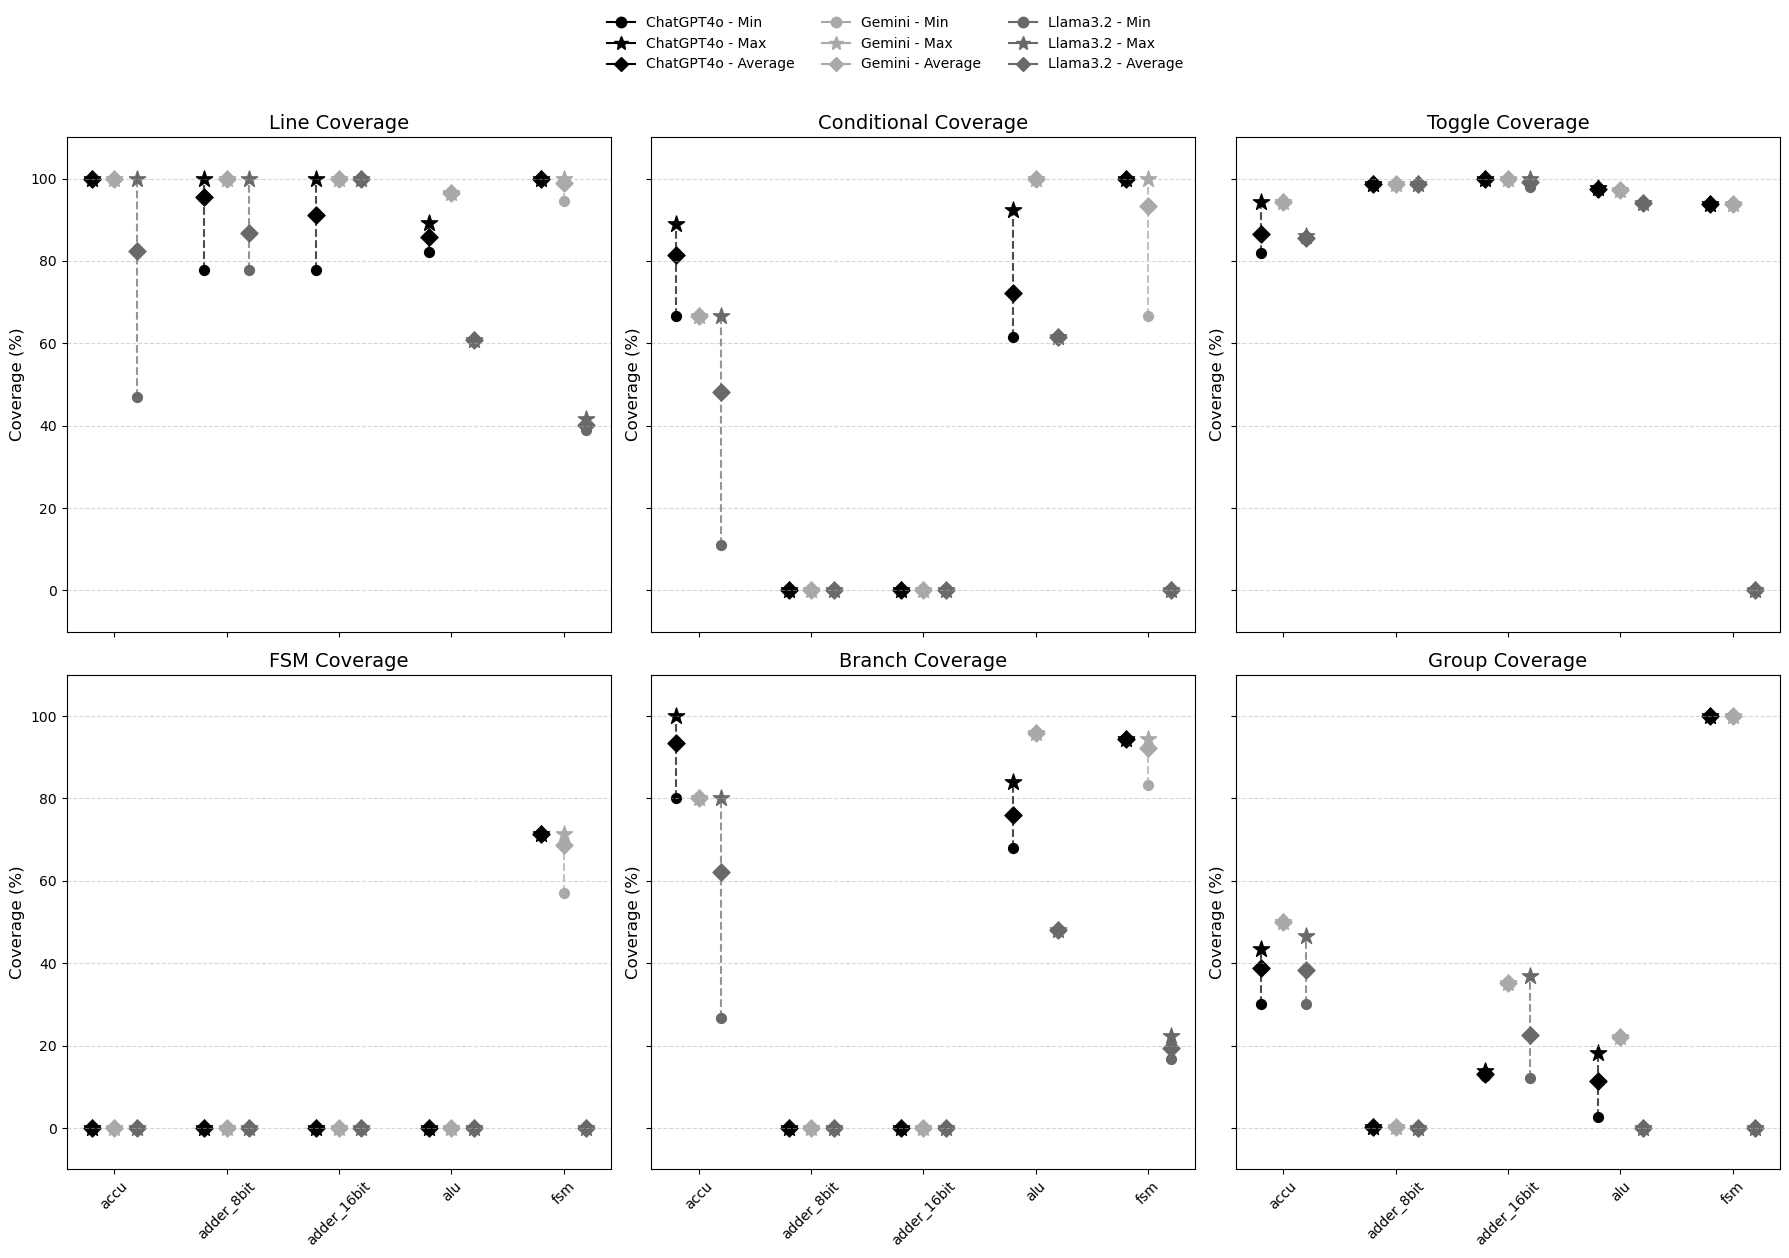


Statistics for Dataset: Chatgpt4o

Design: accu
                min     max     avg
Line         100.00  100.00  100.00
Conditional   66.67   88.89   81.48
Toggle        81.97   94.26   86.61
FSM            0.00    0.00    0.00
Branch        80.00  100.00   93.33
Group         30.00   43.33   38.89

Design: adder_8bit
               min     max    avg
Line         77.78  100.00  95.56
Conditional   0.00    0.00   0.00
Toggle       98.57   98.57  98.57
FSM           0.00    0.00   0.00
Branch        0.00    0.00   0.00
Group         0.11    0.21   0.18

Design: adder_16bit
               min     max    avg
Line         77.78  100.00  91.11
Conditional   0.00    0.00   0.00
Toggle       99.87   99.87  99.87
FSM           0.00    0.00   0.00
Branch        0.00    0.00   0.00
Group        12.73   13.94  13.13

Design: alu
               min    max    avg
Line         82.14  89.29  85.71
Conditional  61.54  92.31  72.31
Toggle       97.30  97.62  97.56
FSM           0.00   0.00   0.00
Bran

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from CSV files
chatgpt4o = pd.read_csv('chatgpt4o.csv')
gemini = pd.read_csv('gemini.csv')
llama = pd.read_csv('llama.csv')

# Combine datasets for unified processing
datasets = {'chatgpt4o': chatgpt4o, 'gemini': gemini, 'llama': llama}

# Function to calculate statistics
def calculate_stats(dataset, column_name, design):
    values = dataset[(dataset['Design'] == design)][column_name].replace(0, None).dropna()
    return {
        'min': values.min() if not values.empty else 0,
        'max': values.max() if not values.empty else 0,
        'avg': values.mean() if not values.empty else 0,
    }

columns_to_analyze = ["Line", "Conditional", "Toggle", "FSM", "Branch", "Group"]
designs = ["accu", "adder_8bit", "adder_16bit", "alu", "fsm"]

# Calculate statistics for each design and dataset
all_statistics = {
    dataset_name: {
        design: {col: calculate_stats(df, col, design) for col in columns_to_analyze}
        for design in designs
    }
    for dataset_name, df in datasets.items()
}

# Plot min, max, and avg for each metric with spacing
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12), sharex=True, sharey=True)
axes = axes.flatten()

markers = {'min': '.', 'max': '*', 'avg': 'D'}
sizes = {'min': 200, 'max': 150, 'avg': 75}
colors = {'chatgpt4o': 'black', 'gemini': 'darkgrey', 'llama': 'dimgrey'}
spacing = {'chatgpt4o': -0.2, 'gemini': 0, 'llama': 0.2}  # Spacing offsets

for idx, col in enumerate(columns_to_analyze):
    ax = axes[idx]
    for dataset_name, dataset_stats in all_statistics.items():
        for design_idx, design in enumerate(designs):
            stats = dataset_stats[design][col]
            x_base = design_idx + spacing[dataset_name]  # Apply spacing
            for stat, value in stats.items():
                ax.scatter(
                    [x_base], [value], 
                    label=f"{dataset_name.capitalize()} - {stat.capitalize()}" if design_idx == 0 and stat == 'min' else "",
                    color=colors[dataset_name], marker=markers[stat], s=sizes[stat]
                )

            # Draw vertical lines connecting min, max, and avg for each dataset
            ax.vlines(
                x=x_base, ymin=stats['min'], ymax=stats['max'],
                colors=colors[dataset_name], linestyles='dashed', alpha=0.7
            )

    ax.set_title(f"{col} Coverage", fontsize=14)
    ax.set_ylabel("Coverage (%)", fontsize=12)
    ax.set_ylim(-10, 110)  # Set uniform Y-axis range
    ax.grid(axis='y', linestyle='--', alpha=0.5)

    # Set x-axis labels on all subplots
    ax.set_xticks(range(len(designs)))
    ax.set_xticklabels(designs, rotation=45, fontsize=10)

# Remove any unused subplots if the number of columns_to_analyze < 6
if len(columns_to_analyze) < len(axes):
    for idx in range(len(columns_to_analyze), len(axes)):
        fig.delaxes(axes[idx])

# Add a shared legend with manual marker override
custom_markers = [
    plt.Line2D([0], [0], marker='.', color='black', markersize=15, label="ChatGPT4o - Min"),
    plt.Line2D([0], [0], marker='*', color='black', markersize=10, label="ChatGPT4o - Max"),
    plt.Line2D([0], [0], marker='D', color='black', markersize=7.5, label="ChatGPT4o - Average"),
    plt.Line2D([0], [0], marker='.', color='darkgrey', markersize=15, label="Gemini - Min"),
    plt.Line2D([0], [0], marker='*', color='darkgrey', markersize=10, label="Gemini - Max"),
    plt.Line2D([0], [0], marker='D', color='darkgrey', markersize=7.5, label="Gemini - Average"),
    plt.Line2D([0], [0], marker='.', color='dimgrey', markersize=15, label="Llama3.2 - Min"),
    plt.Line2D([0], [0], marker='*', color='dimgrey', markersize=10, label="Llama3.2 - Max"),
    plt.Line2D([0], [0], marker='D', color='dimgrey', markersize=7.5, label="Llama3.2 - Average")
]
fig.legend(
    handles=custom_markers,
    loc='upper center', ncol=3, fontsize=10, bbox_to_anchor=(0.5, 1.05), frameon=False
)
fig.tight_layout(rect=[0, 0, 1, 0.97])

plt.show()

# Print statistics for all designs and datasets
for dataset_name, dataset_stats in all_statistics.items():
    print(f"\nStatistics for Dataset: {dataset_name.capitalize()}")
    for design, stats in dataset_stats.items():
        print(f"\nDesign: {design}")
        stats_df = pd.DataFrame(stats).T
        stats_df["min"] = stats_df["min"].round(2)
        stats_df["max"] = stats_df["max"].round(2)
        stats_df["avg"] = stats_df["avg"].round(2)
        print(stats_df)
